<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_3_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.157758,52.400846,63.255275,0.001917,168.815796,168.814262,0.001534
1,0.0,1.0,92.107152,60.975808,43.692088,-0.001967,206.773080,206.774762,-0.001682
2,0.0,2.0,79.086516,49.236926,47.957094,-0.001285,186.279252,186.280364,-0.001112
3,0.0,3.0,70.731426,86.944712,44.628664,-0.001246,212.303556,212.304969,-0.001412
4,0.0,4.0,34.185671,56.272738,82.793395,0.001385,183.253189,183.252410,0.000779
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,43.914762,34.896146,27.102592,-0.004308,115.909192,115.911196,-0.002004
29996,999.0,26.0,36.592745,36.594131,68.048311,0.001476,151.236662,151.234871,0.001791
29997,999.0,27.0,86.203301,61.617174,74.583789,0.000636,232.404900,232.405008,-0.000109
29998,999.0,28.0,84.034003,33.576461,72.741688,0.007158,200.359310,200.352378,0.006932


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    43.157758  52.400846  63.255275  0.001917  168.815796   
      1.0    92.107152  60.975808  43.692088 -0.001967  206.773080   
      2.0    79.086516  49.236926  47.957094 -0.001285  186.279252   
      3.0    70.731426  86.944712  44.628664 -0.001246  212.303556   
      4.0    34.185671  56.272738  82.793395  0.001385  183.253189   
...                ...        ...        ...       ...         ...   
999.0 25.0   43.914762  34.896146  27.102592 -0.004308  115.909192   
      26.0   36.592745  36.594131  68.048311  0.001476  151.236662   
      27.0   86.203301  61.617174  74.583789  0.000636  232.404900   
      28.0   84.034003  33.576461  72.741688  0.007158  200.359310   
      29.0   89.452442  33.756729  56.589996 -0.001891  189.797276   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    168.814262  0.001534  
      1.0    206.774762 -0.001682  
      2.0    186.280364 -0.001112  
      3.0    212.304969 -0.001412  
      4.0    183.252410  0.000779  
...                 ...       ...  
999.0 25.0   115.911196 -0.002004  
      26.0   151.234871  0.001791  
      27.0   232.405008 -0.000109  
      28.0   200.352378  0.006932  
      29.0   189.798641 -0.001365  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    43.157758  52.400846  63.255275  0.001917  168.815796   
      1.0    92.107152  60.975808  43.692088 -0.001967  206.773080   
      2.0    79.086516  49.236926  47.957094 -0.001285  186.279252   
      3.0    70.731426  86.944712  44.628664 -0.001246  212.303556   
      4.0    34.185671  56.272738  82.793395  0.001385  183.253189   
...                ...        ...        ...       ...         ...   
999.0 25.0   43.914762  34.896146  27.102592 -0.004308  115.909192   
      26.0   36.592745  36.594131  68.048311  0.001476  151.236662   
      27.0   86.203301  61.617174  74.583789  0.000636  232.404900   
      28.0   84.034003  33.576461  72.741688  0.007158  200.359310   
      29.0   89.452442  33.756729  56.589996 -0.001891  189.797276   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    168.814262  0.001534  
      1.0    206.774762 -0.001682  
      2.0    186.280364 -0.001112  
      3.0    212.304969 -0.001412  
      4.0    183.252410  0.000779  
...                 ...       ...  
999.0 25.0   115.911196 -0.002004  
      26.0   151.234871  0.001791  
      27.0   232.405008 -0.000109  
      28.0   200.352378  0.006932  
      29.0   189.798641 -0.001365  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.157758,52.400846,63.255275,0.001917,168.815796,168.814262,0.001534
1,0.0,1.0,92.107152,60.975808,43.692088,-0.001967,206.773080,206.774762,-0.001682
2,0.0,2.0,79.086516,49.236926,47.957094,-0.001285,186.279252,186.280364,-0.001112
3,0.0,3.0,70.731426,86.944712,44.628664,-0.001246,212.303556,212.304969,-0.001412
4,0.0,4.0,34.185671,56.272738,82.793395,0.001385,183.253189,183.252410,0.000779
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,43.914762,34.896146,27.102592,-0.004308,115.909192,115.911196,-0.002004
29996,999.0,26.0,36.592745,36.594131,68.048311,0.001476,151.236662,151.234871,0.001791
29997,999.0,27.0,86.203301,61.617174,74.583789,0.000636,232.404900,232.405008,-0.000109
29998,999.0,28.0,84.034003,33.576461,72.741688,0.007158,200.359310,200.352378,0.006932


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    43.157758  52.400846  63.255275  0.001917  168.815796   
      1.0    92.107152  60.975808  43.692088 -0.001967  206.773080   
      2.0    79.086516  49.236926  47.957094 -0.001285  186.279252   
      3.0    70.731426  86.944712  44.628664 -0.001246  212.303556   
      4.0    34.185671  56.272738  82.793395  0.001385  183.253189   
...                ...        ...        ...       ...         ...   
999.0 25.0   43.914762  34.896146  27.102592 -0.004308  115.909192   
      26.0   36.592745  36.594131  68.048311  0.001476  151.236662   
      27.0   86.203301  61.617174  74.583789  0.000636  232.404900   
      28.0   84.034003  33.576461  72.741688  0.007158  200.359310   
      29.0   89.452442  33.756729  56.589996 -0.001891  189.797276   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    168.814262  0.001534  
      1.0    206.774762 -0.001682  
      2.0    186.280364 -0.001112  
      3.0    212.304969 -0.001412  
      4.0    183.252410  0.000779  
...                 ...       ...  
999.0 25.0   115.911196 -0.002004  
      26.0   151.234871  0.001791  
      27.0   232.405008 -0.000109  
      28.0   200.352378  0.006932  
      29.0   189.798641 -0.001365  

[30000 rows x 7 columns]

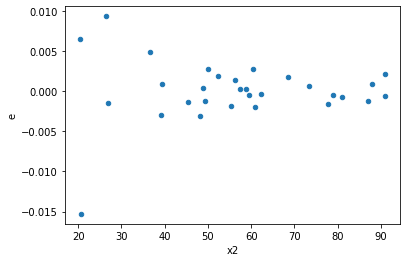

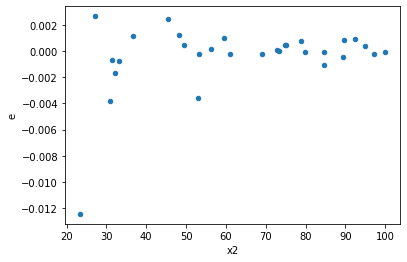

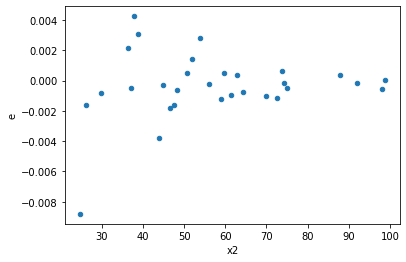

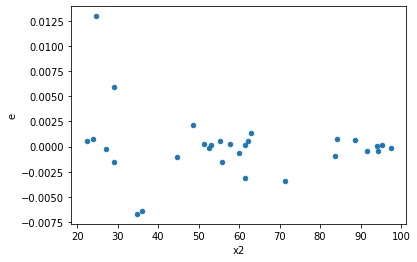

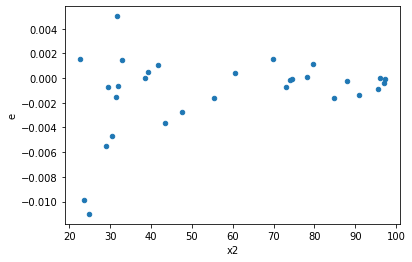

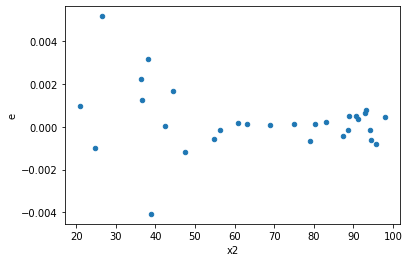

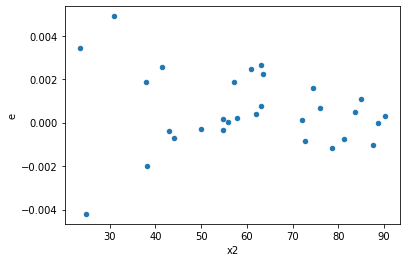

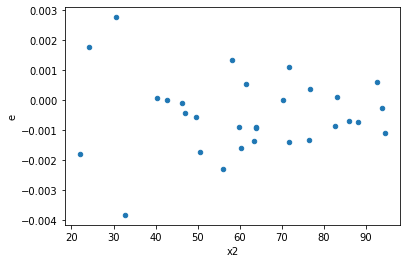

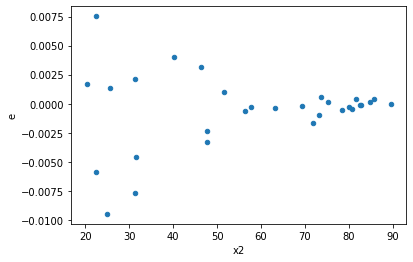

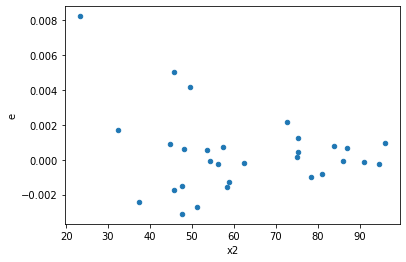

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,12.0,12.0,5.0183631442673686e-05,0.0002702611687420754,4.181969286889474e-06,2.2521764061839616e-05,5.385444635484442,0.006664420298025275,0.9966677898509874,0.0033322101490126377,Reject001=0 : Heteroscedasticity
3.0,14.0,10.0,1.9755776662794573e-05,0.0002484151870436714,1.4111269044853267e-06,2.484151870436714e-05,17.60402882647005,6.834986020565204e-05,0.9999658250698972,3.417493010282602e-05,Reject001=0 : Heteroscedasticity
6.0,13.0,11.0,2.003889740325434e-05,4.722319184333093e-05,1.5414536464041802e-06,4.293017440302812e-06,2.785044785691306,0.09730026146064819,0.9513498692696759,0.04865013073032409,Reject001=1 : Homoscedasticity
7.0,14.0,10.0,1.1013620140294979e-05,1.5642360624743775e-05,7.866871528782128e-07,1.5642360624743776e-06,1.9883838915525514,0.2777504134114521,0.8611247932942739,0.13887520670572606,Reject001=1 : Homoscedasticity
8.0,12.0,12.0,2.558199666332566e-05,0.00012132542698315114,2.1318330552771384e-06,1.0110452248595928e-05,4.742609757161106,0.011557668831737367,0.9942211655841313,0.005778834415868683,Reject001=1 : Homoscedasticity
9.0,5.0,19.0,2.598646530540915e-06,0.000122429725787498,5.197293061081829e-07,6.443669778289368e-06,12.398126683562658,3.863042876739442e-05,0.9999806847856163,1.931521438369721e-05,Reject001=0 : Heteroscedasticity
12.0,14.0,10.0,4.304731600488887e-05,7.256204641111742e-05,3.074808286063491e-06,7.256204641111743e-06,2.3598884762995955,0.17658638538877103,0.9117068073056145,0.08829319269438551,Reject001=1 : Homoscedasticity
16.0,7.0,17.0,5.141935457722087e-06,5.4445567777666704e-05,7.345622082460124e-07,3.2026804575098063e-06,4.359985337602878,0.012374973917352428,0.9938125130413238,0.006187486958676214,Reject001=1 : Homoscedasticity
19.0,10.0,14.0,5.400394368521434e-05,7.913524663310112e-05,5.400394368521434e-06,5.65251761665008e-06,1.0466860808533274,0.9129698731357161,0.543515063432142,0.45648493656785805,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,12.0,5.0183631442673686e-05,0.0002702611687420754,4.181969286889474e-06,2.2521764061839616e-05,5.385444635484442,0.006664420298025275,Reject001=0 : Heteroscedasticity
1.0,14.0,10.0,0.00014879107983001289,4.350172387382215e-06,1.0627934273572348e-05,4.3501723873822153e-07,0.04093149501497623,7.467006838681549e-07,Reject001=0 : Heteroscedasticity
2.0,11.0,13.0,9.794475379480268e-05,9.745651525516472e-06,8.904068526800243e-06,7.496655019628055e-07,0.08419359079575778,0.00023523469796317428,Reject001=0 : Heteroscedasticity
3.0,14.0,10.0,1.9755776662794573e-05,0.0002484151870436714,1.4111269044853267e-06,2.484151870436714e-05,17.60402882647005,6.834986020565204e-05,Reject001=0 : Heteroscedasticity
4.0,20.0,4.0,0.0002444559402975351,2.1394518617868472e-06,1.2222797014876756e-05,5.348629654467118e-07,0.04375945741352925,6.399548821360691e-07,Reject001=0 : Heteroscedasticity
5.0,5.0,19.0,3.031733356385928e-05,2.823947234482592e-05,6.063466712771856e-06,1.4862880181487326e-06,0.24512182362905893,0.12570394207171665,Reject001=1 : Homoscedasticity
6.0,13.0,11.0,2.003889740325434e-05,4.722319184333093e-05,1.5414536464041802e-06,4.293017440302812e-06,2.785044785691306,0.09730026146064819,Reject001=1 : Homoscedasticity
7.0,14.0,10.0,1.1013620140294979e-05,1.5642360624743775e-05,7.866871528782128e-07,1.5642360624743776e-06,1.9883838915525514,0.2777504134114521,Reject001=1 : Homoscedasticity
8.0,12.0,12.0,2.558199666332566e-05,0.00012132542698315114,2.1318330552771384e-06,1.0110452248595928e-05,4.742609757161106,0.011557668831737367,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      586
Reject001=0 : Heteroscedasticity    414
Name: Result_test, dtype: int64